In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df_iris = pd.read_csv('iris_teach_2.csv')
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
148,6.7,3.0,5.2,2.3,virginica
149,6.3,2.5,5.0,1.9,virginica
150,6.5,3.0,5.2,2.0,virginica
151,6.2,3.4,5.4,2.3,virginica


In [3]:
for col in df_iris:
    print(f'{col:<20} {sum([1 if x else 0 for x in df_iris[col].isnull()])}')

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1


In [4]:
df_iris.isnull().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [5]:
for col in df_iris:
    print(f'{col:<20} {sum([1 if x else 0 for x in df_iris[col].dropna().isnull()])}')

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0


In [6]:
df_iris.dropna().isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [7]:
df_iris.dropna(inplace=True)
X = df_iris.drop(columns=['iris_name'])
y = df_iris['iris_name']
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
148                6.7               3.0                5.2               2.3
149                6.3               2.5                5.0               1.9
150                6.5               3.0                5.2               2.0
151                6.2               3.4                5.4               2.3
152                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [8]:
labeler = LabelEncoder()
y_enc = labeler.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.20, random_state=42)

In [10]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
68,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
44,4.4,3.2,1.3,0.2
...,...,...,...,...
74,6.1,2.8,4.0,1.3
109,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
95,5.8,2.6,4.0,1.2


In [11]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [12]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
predicted_y = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsa

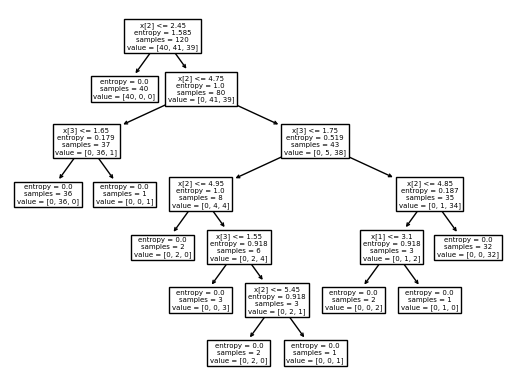

In [14]:
plot_tree(tree_clf)

In [15]:
param_grid = {'max_depth':[1,2,3,4,5,6,7]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 6}


In [16]:
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42)  
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsa

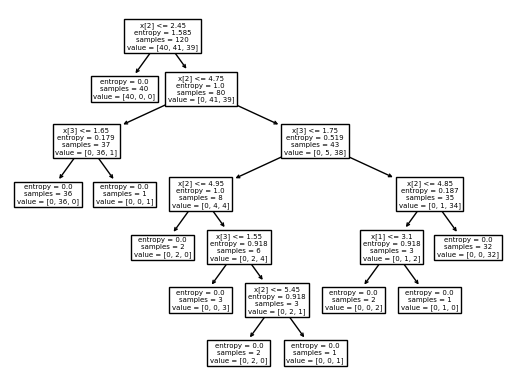

In [17]:
plot_tree(tree_clf_tuned)

In [18]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y_enc
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

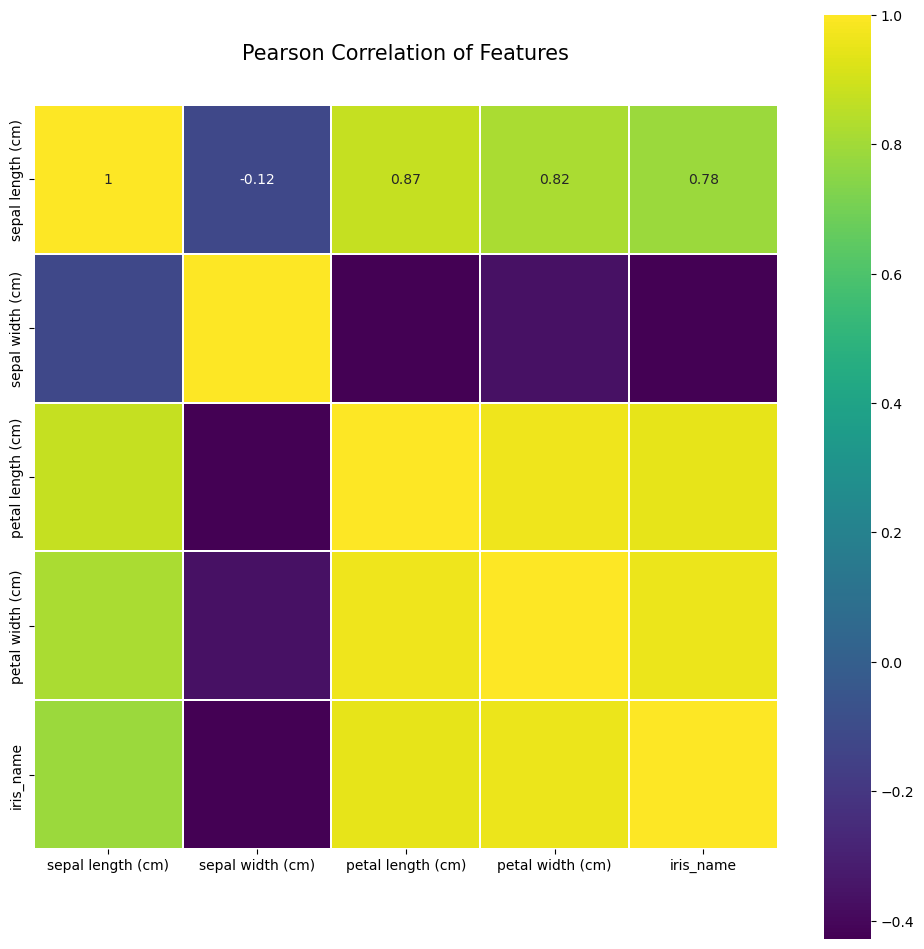

In [19]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [20]:
# The initial observation provided by this heatmap is very valuable as it 
# allows for a quick understanding of the predictive power of each feature.

# It is evident from the heatmap that the *petal length* and *petal width*
# exhibit the strongest correlations (in absolute terms) with the target classes, 
# with respective values of 0.95 and 0.96.

# However, it should be noted that these two features also have a very high correlation
# with each other (0.96, the highest in the dataset), implying that they may be 
# conveying the same information. Consequently, utilizing both of these features as 
# inputs for the same model might not be advisable. 

# If we look up to the example we can see that the column 2 from X (*petal length*) is in 
# the root. Therefore, further exploration and comparison of these features is required.

In [21]:
optimised_df = df_clean_iris_set.drop(['petal width (cm)'], axis=1)

In [22]:
optimised_df

,sepal length (cm),sepal width (cm),petal length (cm),iris_name
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
148,6.7,3.0,5.2,2
149,6.3,2.5,5.0,2
150,6.5,3.0,5.2,2
151,6.2,3.4,5.4,2


<Axes: title={'center': 'Pearson Correlation of Features'}>

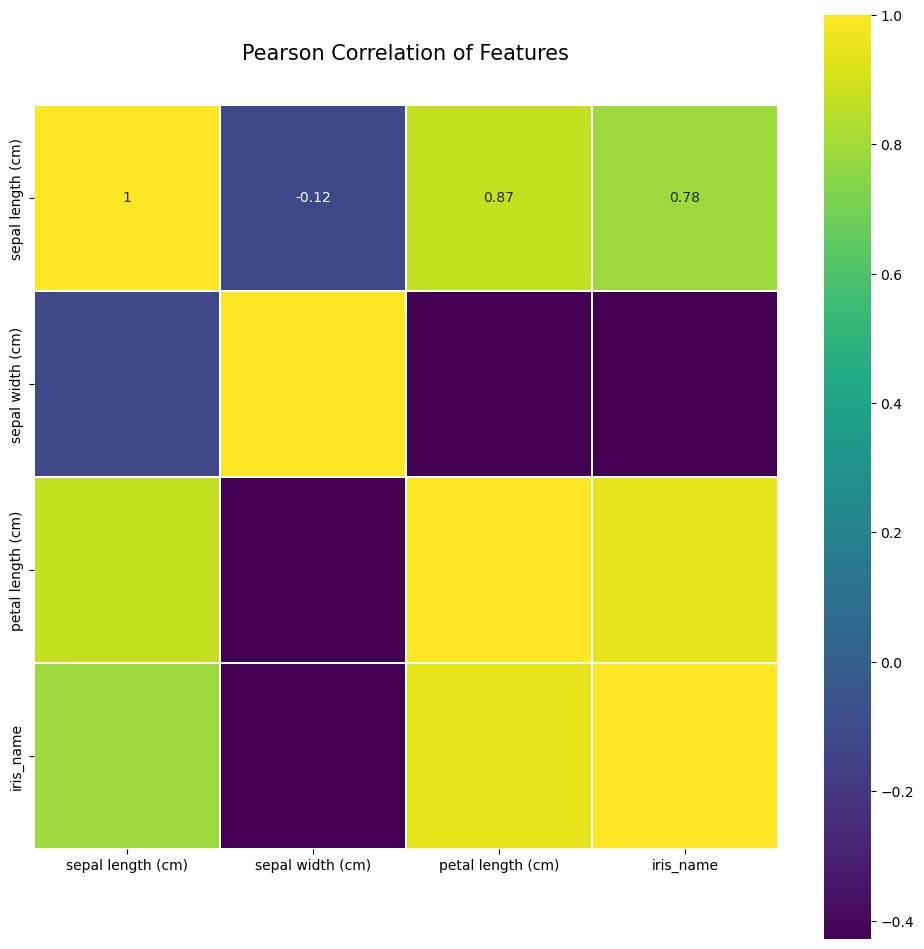

In [23]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(optimised_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [24]:
X = optimised_df.drop(columns=['iris_name'])
y = optimised_df['iris_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
148,6.7,3.0,5.2
149,6.3,2.5,5.0
150,6.5,3.0,5.2
151,6.2,3.4,5.4


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
148    2
149    2
150    2
151    2
152    2
Name: iris_name, Length: 150, dtype: int32

In [27]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
predicted_y = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.93


In [29]:
param_grid = {'max_depth':[1,2,3,4,5,6,7]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 4}


In [30]:
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42)  
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.4444444444444444, 0.9545454545454546, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.3333333333333333, 0.8636363636363636, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.8636363636363636, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.3333333333333333, 0.7727272727272727, 'x[0] <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.6818181818181818, 'x[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.5909090909090909, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.5909090909090909, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.6818181818181818, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.7727272727272727, 'x[2] <= 5.15\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.6666666666666666, 0.6818181818181818,

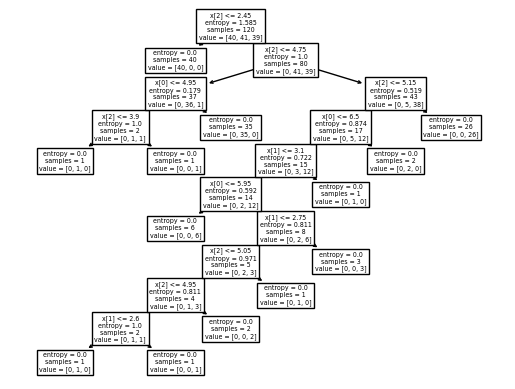

In [31]:
plot_tree(tree_clf)

[Text(0.4444444444444444, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.3, 'x[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 5.15\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 6.5\nentropy = 0.874\nsamples = 17\nvalue = [0, 5, 12]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.722\nsamples = 15\nvalue = [0, 3, 12]'

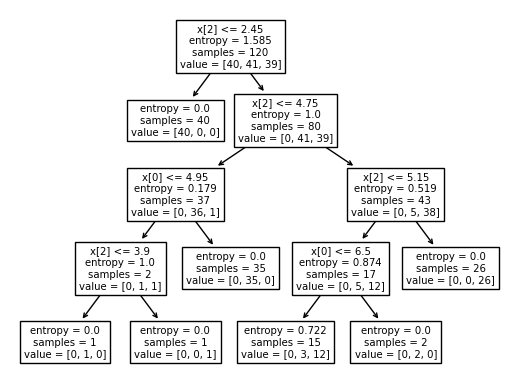

In [32]:
plot_tree(tree_clf_tuned)

In [33]:
predicted_y = tree_clf_tuned.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97
